In [1]:
import requests
from simulator import get_league_status, get_fixtures, mcmc_season
from matplotlib import pyplot as plt
import numpy as np

# Put in your username and password here
username= ''
password = ''

In [2]:
url_home = 'https://fantasy.premierleague.com'
values = {
    'login': username,
    'password': password,
    'app': 'plfpl-web',
    'redirect_uri': 'https://fantasy.premierleague.com/'
}

with requests.Session() as session:
    html_home = session.get(url_home)
    session.post('https://users.premierleague.com/accounts/login/', 
                 data=values)
    league_status = get_league_status(session)
    league_dict = dict((x['player_name'], x['points_total']) for x in league_status['standings']['results'])
    fixture_dict = get_fixtures(session)

In [3]:
rankings = mcmc_season(league_dict, fixture_dict, 100000)

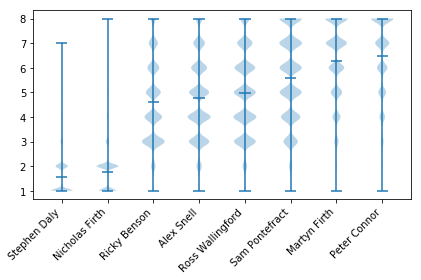

In [4]:
fig, ax = plt.subplots()
league_keys = rankings.keys()
ax.violinplot([rankings[x] for x in league_keys], showmeans=True,)
ax.set_xticks(np.arange(1, len(league_keys) + 1))
ax.set_xticklabels(league_keys, rotation=45, ha='right')
fig.tight_layout()

In [13]:
for key, value in rankings.items():
    print('%s: %f%%' % (key, 100*np.sum(value < 5) / value.shape[0]))

Stephen Daly: 99.179000%
Nicholas Firth: 98.931000%
Ricky Benson: 52.566000%
Alex Snell: 47.686000%
Ross Wallingford: 42.781000%
Sam Pontefract: 29.441000%
Martyn Firth: 15.653000%
Peter Connor: 13.763000%
